<table>
    <tr>
        <td>
        <center>
        <font size="+1">If you haven't used BigQuery datasets on Kaggle previously, check out the <a href = "https://www.kaggle.com/rtatman/sql-scavenger-hunt-handbook/">Scavenger Hunt Handbook</a> kernel to get started.</font>
        </center>
        </td>
    </tr>
</table>

___ 

## Previous days:

* [**Day 1:** SELECT, FROM & WHERE](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-1/)
* [**Day 2:** GROUP BY, HAVING & COUNT()](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-2/)
* [**Day 3:** ORDER BY & Dates](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-3/)
* [**Day 4:** WITH & AS](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-4/)

____


## JOIN
___

Whew, we've come a long way from Day 1! By now, you have the tools to get many different configurations of information from a single table. But what if your database has more than one table and you want to look at information from multiple tables?

That's where JOIN comes in! Today, we're going to learn about how to use JOIN to combine data from two tables. This will let us answer more types of questions. It's also one of the more complex parts of SQL. Don't worry, though, we're going to go through some examples together. 

### JOIN
___

Let's keep working with our imaginary Pets dataset, but this time let's add a second table. The first table, "Pets", has three columns, with information on the ID number of each pet, the pet's name and the type of animal it is. The new table, "Owners", has three columns, with the ID number of each owner, the name of the owner and the ID number of their pet. 

![](https://i.imgur.com/W4gYoNg.png)

Each row in each table is associated with a single pet and we refer to the same pets in both tables. We can tell this because there are two columns (ID in the "Pets" table and Pet_ID in the "Owners" table) that have the same information in them: the ID number of the pet. We can match rows that have the same value in these columns to get information that applies to a certain pet.

For example, we can see by looking at the Pets table that the pet that has the ID 1 is named Dr. Harris Bonkers. We can also tell by looking at the Owners table that the name of the owner who owns the pet with the ID 1 is named Aubrey Little. We can use this information to figure out that Dr. Harris Bonkers is owned by Aubrey Little. 

Fortunately, we don't have to do this by hand to figure out which owner's name goes with which pet name. We can use JOIN to do this for us! JOIN allows us to create a third, new, table that has information from both tables. For example, we might want to have a single table with just two columns: one with the name of the pet and one with the name of the owner. This would look something like this: 

![](https://i.imgur.com/zqQdJTI.png)

The syntax to create that table looks like this:

    SELECT p.Name AS Pet_Name, o.Name as Owner_Name
    FROM `bigquery-public-data.pet_records.pets` as p
    INNER JOIN `bigquery-public-data.pet_records.owners` as o ON p.ID = o.Pet_ID
Notice that since the ID column exists in both datasets, we have to clarify which one we want to use. When you're joining tables, it's a good habit to specificy which table all of your columns come from. That way you don't have to pull up the schema every time you go back to read the query.

The type of JOIN we're using today is called an INNER JOIN. That just means that a row will only be put in the final output table if the value in the column you're using to combine them shows up in both the tables you're joining. For example, if Tom's ID code of 4 didn't exist in the `Pets` table, we would only get 3 rows back from this query. There are other types of JOIN, but an INNER JOIN won't give you an output that's larger than your input tables, so it's a good one to start with.   

> **What does "ON" do?** It says which column in each table to look at to combine the tables. Here were using the "ID" column from the Pets table and the "Pet_ID" table from the Owners table.

Now that we've talked about the concept behind using JOIN, let's work through an example together.

## Example: How many files are covered by each license?
____

Today we're going to be using the GitHub Repos dataset. GitHub is an place for people to store & collaborate on different versions of their computer code. A "repo" is a collection of code associated with a specific project. 

Most public code on Github is shared under a specific license, which determines how it can be used and by who. For our example, we're going to look at how many different files have been released under each licenses. 

First, of course, we need to get our environment ready to go:

In [1]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
github = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="github_repos")

Now we're ready to get started on our query. This one is going to be a bit of a beast, so stick with me! The only new syntax we'll see is around the JOIN clause, everything is something we've already learned. :)

First, I'm going to specify which columns I'd like to be returned in the final table that's returned to me. Here, I'm selecting the COUNT of the "path" column from the sample_files table and then calling it "number_of_files". I'm *also* specifying that I was to include the "license" column, even though there's no "license" column in the "sample_files" table.

        SELECT L.license, COUNT(sf.path) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` as sf
Speaking of the JOIN clause, we still haven't actually told SQL we want to join anything! To do this, we need to specify what type of join we want (in this case an inner join) and how which columns we want to JOIN ON. Here, I'm using ON to specify that I want to use the "repo_name" column from the each table.

    INNER JOIN `bigquery-public-data.github_repos.licenses` as L 
            ON sf.repo_name = L.repo_name
And, finally, we have a GROUP BY and ORDER BY clause that apply to the final table that's been returned to us. We've seen these a couple of times at this point. :)

        GROUP BY license
        ORDER BY number_of_files DESC
 Alright, that was a lot, but you should have an idea what each part of this query is doing. :) Without any further ado, let' put it into action.

In [2]:
# You can use two dashes (--) to add comments in SQL
query = ("""
        -- Select all the columns we want in our joined table
        SELECT L.license, COUNT(sf.path) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` as sf
        -- Table to merge into sample_files
        INNER JOIN `bigquery-public-data.github_repos.licenses` as L 
            ON sf.repo_name = L.repo_name -- what columns should we join on?
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """)

file_count_by_license = github.query_to_pandas_safe(query, max_gb_scanned=6)

Whew, that was a big query! But it gave us a nice tidy little table that nicely summarizes how many files have been committed under each license:  

In [3]:
# print out all the returned results
print(file_count_by_license)

         license  number_of_files
0        gpl-2.0         22031724
1            mit         21186498
2     apache-2.0          7578582
3        gpl-3.0          5550163
4   bsd-3-clause          3319394
5       agpl-3.0          1435105
6       lgpl-2.1           962034
7   bsd-2-clause           779810
8       lgpl-3.0           684163
9        mpl-2.0           504080
10       cc0-1.0           437764
11       epl-1.0           389338
12     unlicense           209350
13  artistic-2.0           155854
14           isc           133570


And that's how to get started using JOIN in BigQuery! There are many other kinds of joins (you can [read about some here](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#join-types)), so once you're very comfortable with INNER JOIN you can start exploring some of them. :)

# Scavenger hunt
___

Now it's your turn! Here is the question I would like you to get the data to answer. Just one today, since you've been working hard this week. :)

*  How many commits (recorded in the "sample_commits" table) have been made in repos written in the Python programming language? (I'm looking for the number of commits per repo for all the repos written in Python.
    * You'll want to JOIN the sample_files and sample_commits questions to answer this.
    * **Hint:** You can figure out which files are written in Python by filtering results from the "sample_files" table using `WHERE path LIKE '%.py'`. This will return results where the "path" column ends in the text ".py", which is one way to identify which files have Python code.

In order to answer these questions, you can fork this notebook by hitting the blue "Fork Notebook" at the very top of this page (you may have to scroll up). "Forking" something is making a copy of it that you can edit on your own without changing the original.

### Q1)  How many commits (recorded in the "sample_commits" table) have been made in repos written in the Python programming language? (I'm looking for the number of commits per repo for all the repos written in Python.)

In [4]:
github.head('sample_files')

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [5]:
github.head('sample_commits')

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,3eca86e75ec7a7d4b9a9c8091b11676f7bd2a39f,8e1b4380409a85a922ee0d3f622b5dd4d16bcfad,[104a0c02e8b1936c049e18a6d4e4ab040fb61213],"{'name': 'Mark Rutland', 'email': '1db9dd262be...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: Remove fixmap include fragility,arm64: Remove fixmap include fragility\n\nThe ...,"[{'key': 'Signed-off-by', 'value': 'Mark Rutla...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
1,7158627686f02319c50c8d9d78f75d4c8d126ff2,3b4d781bd966f07cad1b67b137f0ff8b89430e9a,[66aa8d6a145b6a66566b4fce219cc56c3d0e01c3],"{'name': 'Will Deacon', 'email': 'b913f13ef92a...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: percpu: implement optimised pcpu access...,arm64: percpu: implement optimised pcpu access...,"[{'key': 'Signed-off-by', 'value': 'Will Deaco...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
2,9732cafd9dc0206479be919baf0067239f0a63ca,c8878035ac9cb6dce592957f12dc1723a583989d,[f3c003f72dfb2497056bcbb864885837a1968ed5],"{'name': 'Jiang Liu', 'email': 'c745fa7b96fe79...","{'name': 'Catalin Marinas', 'email': '15ce75b2...","arm64, jump label: optimize jump label impleme...","arm64, jump label: optimize jump label impleme...","[{'key': 'Reviewed-by', 'value': 'Will Deacon ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
3,4702abd3f9728893ad5b0f4389e1902588510459,32926e7c55ef585d9b9c174a0e5f9ed13ed6bf7e,[ddf28352b80c86754a6424e3a61e8bdf9213b3c7],"{'name': 'Nicolas Pitre', 'email': '408789a210...","{'name': 'Arnd Bergmann', 'email': 'f2c659f019...",ARM: mach-nuc93x: delete,ARM: mach-nuc93x: delete\n\nThis architecture ...,"[{'key': 'Signed-off-by', 'value': 'Nicolas Pi...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
4,57bd4b91a6cfc5bad4c5d829ef85293ea63643ea,2ffc2066eb7638e185663e9d849663403229d4e5,[f74c95c20bad8e183e41283475f68a3e7b247af4],"{'name': 'Ben Dooks', 'email': '1177f64998f284...","{'name': 'Ben Dooks', 'email': '1177f64998f284...",[ARM] S3C24XX: Movev udc headers to arch/arm/p...,[ARM] S3C24XX: Movev udc headers to arch/arm/p...,"[{'key': 'Signed-off-by', 'value': 'Ben Dooks ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None


In [6]:
# Your code goes here :)

query1 = ("""
        SELECT sf.repo_name, COUNT(sc.commit) AS num_commits_py
        FROM `bigquery-public-data.github_repos.sample_files` as sf
        INNER JOIN `bigquery-public-data.github_repos.sample_commits` as sc 
            ON sf.repo_name = sc.repo_name    
        WHERE sf.path LIKE '%.py'
        GROUP BY sf.repo_name
        ORDER BY num_commits_py DESC
        """)


In [7]:
commits_per_py_repo = github.query_to_pandas_safe(query1,  max_gb_scanned=6)


In [8]:
commits_per_py_repo

,repo_name,num_commits_py
0,torvalds/linux,23501556
1,tensorflow/tensorflow,4128858
2,apple/swift,4044664
3,facebook/react,13750
4,Microsoft/vscode,6909


In [9]:
commits_per_py_repo.to_csv('commits_per_py_repo.csv')

Text(0.5,1,'Commits made in repos written in the Python')

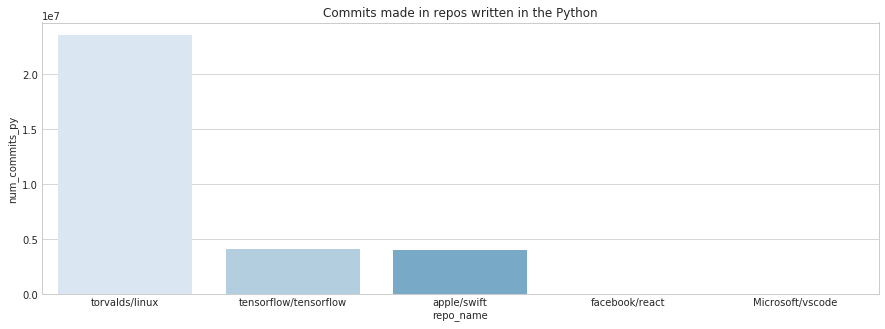

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid") 
ax = sns.barplot(y="num_commits_py", x="repo_name", data=commits_per_py_repo, palette="Blues")
plt.title('Commits made in repos written in the Python')
